<a href="https://colab.research.google.com/github/sumankanukollu/EVA_4/blob/master/suman_MNIS_with_withOutPyTorchModules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import torch
a = torch.range(1, 16)
#a.reshape(4,4)
b=a.view(2,8)
print(b)
b[0,2]=66
print(b)

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12., 13., 14., 15., 16.]])
tensor([[ 1.,  2., 66.,  4.,  5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12., 13., 14., 15., 16.]])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  


In [0]:
# Notes URL : https://github.com/fastai/fastai_old/blob/master/dev_nb/001a_nn_basics.ipynb
from pathlib import Path
import requests

DATA_PATH = Path('data')
PATH = DATA_PATH/'mnist'

PATH.mkdir(parents=True, exist_ok=True)

#https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz
URL='https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/'
FILENAME='mnist.pkl.gz'

if not (PATH/FILENAME).exists():
    content = requests.get(URL+FILENAME).content
    (PATH/FILENAME).open('wb').write(content)

In [6]:
import os
for r,d,f in os.walk(os.path.join(os.getcwd(),'data')):
  print(r)
  print(d)
  print(f)

/content/data
['mnist']
[]
/content/data/mnist
[]
['mnist.pkl.gz']


In [0]:
import pickle, gzip

with gzip.open(PATH/FILENAME, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [8]:
print(x_train.ndim)
print(x_train.shape)
print(x_train.size)

print(y_train.ndim)
print(y_train.shape)
print(y_train.size)



print(x_valid.ndim)
print(x_valid.shape)
print(x_valid.size)



print(y_valid.ndim)
print(y_valid.shape)
print(y_valid.size)

2
(50000, 784)
39200000
1
(50000,)
50000
2
(10000, 784)
7840000
1
(10000,)
10000


784
y_train is : 5


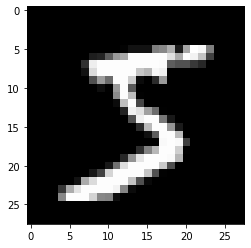

In [9]:
%matplotlib inline

from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28,28)), cmap="gray")
x_train.shape
print(len(x_train[0]))

print('y_train is : %s'%y_train[0])





y_valid value is : 3


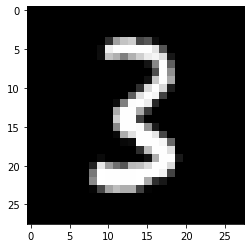

In [10]:
pyplot.imshow(x_valid[0].reshape((28,28)), cmap="gray")
x_valid.shape

print('y_valid value is : %s'%y_valid[0])

In [11]:
import torch 

x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max(),y_train.shape

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor(0),
 tensor(9),
 torch.Size([50000]))

In [0]:
import math

weights = torch.randn(784,10)/math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [13]:
print(weights)

tensor([[-0.0023, -0.0486,  0.0627,  ..., -0.0029,  0.0163,  0.0305],
        [ 0.0384,  0.0429,  0.0487,  ..., -0.0289, -0.0060, -0.0125],
        [-0.0265,  0.0370,  0.0239,  ..., -0.0159, -0.0617, -0.0332],
        ...,
        [ 0.0284, -0.0156, -0.0114,  ...,  0.0119,  0.0170, -0.0020],
        [ 0.0699,  0.0051,  0.0114,  ..., -0.0521,  0.0262,  0.0325],
        [-0.0278, -0.0072, -0.0489,  ...,  0.0188,  0.0126,  0.0473]],
       requires_grad=True)


In [0]:
def log_softmax(x): return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):      return log_softmax(xb @ weights + bias)

In [62]:
#### Log_softmax explanation
def log_softmax2(x): return x - x.exp().sum(-1).log().unsqueeze(-1)

import numpy as np
tmp = np.array([[5,4,2],[4,2,8],[4,4,1]],dtype='float')
tmp_tens = torch.tensor(tmp)
print(tmp_tens)
log_softmax(tmp_tens)

tensor([[5., 4., 2.],
        [4., 2., 8.],
        [4., 4., 1.]], dtype=torch.float64)


tensor([[-0.3490, -1.3490, -3.3490],
        [-4.0206, -6.0206, -0.0206],
        [-0.7177, -0.7177, -3.7177]], dtype=torch.float64)

In [15]:
print(x_train[0].ndim)
print(x_train[0].shape)
print(x_train[0].size)
model(x_train[0:64]).shape

1
torch.Size([784])
<built-in method size of Tensor object at 0x7f382f10ac60>


torch.Size([64, 10])

In [16]:
bs=64                  # batch size

xb = x_train[0:bs]     # a mini-batch from x
preds = model(xb)      # predictions
print(preds.shape)
print(len(preds[0]))
preds[0], preds.shape

torch.Size([64, 10])
10


(tensor([-2.2456, -2.5395, -2.2962, -1.9823, -2.5221, -2.0454, -2.6195, -2.4066,
         -2.1996, -2.3707], grad_fn=<SelectBackward>), torch.Size([64, 10]))

In [17]:
print(weights.shape)
print(bias.shape)
print(x_train[0:64].shape)

torch.Size([784, 10])
torch.Size([10])
torch.Size([64, 784])


In [0]:
def nll(input, target): return -input[range(target.shape[0]), target].mean()
loss_func = nll

In [19]:
y_train[0:64]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])

In [20]:
yb=y_train[0:bs]
yb
loss_func(preds,yb)

tensor(2.3390, grad_fn=<NegBackward>)

In [0]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds==yb).float().mean()
    

In [22]:
accuracy(preds,yb)

tensor(0.1250)

In [0]:
from IPython.core.debugger import set_trace

lr = 0.5   # learning rate
epochs = 2 # how many epochs to train for

In [24]:
for epoch in range(epochs):
    print(epoch)
    for i in range((n-1)//bs + 1):
        #set_trace()
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

0
1


In [25]:

loss_func(model(xb), yb), accuracy(model(xb), yb)

(tensor(0.0810, grad_fn=<NegBackward>), tensor(1.))

In [26]:
###########################################################
# *Using torch.nn.functional*
'''
1. replace activation and loss functions with nn.functional module
'''
###############################################################

'\n1. replace activation and loss functions with nn.functional module\n'

In [0]:
import torch.nn.functional as F
loss_func = F.cross_entropy

def model(xb): return xb @ weights + bias

In [28]:
loss_func(model(xb), yb), accuracy(model(xb), yb)

(tensor(0.0810, grad_fn=<NllLossBackward>), tensor(1.))

In [29]:
###########################################################
# Refactor using nn.Module
'''
1. Next up, we'll use nn.Module and nn.Parameter, for a clearer and more concise training loop.
We subclass nn.Module (which itself is a class and able to keep track of state). In this case, we want to create a class that holds our weights, bias, and method for the forward step. nn.Module has a number of attributes and methods (such as .parameters() and .zero_grad()) which we will be using.

NB: nn.Module (uppercase M) is a PyTorch specific concept, and is a class we'll be using a lot. nn.Module is not to be confused with the Python concept of a (lowercase m) module, which is a file of Python code that can be imported.
'''
###############################################################

"\n1. Next up, we'll use nn.Module and nn.Parameter, for a clearer and more concise training loop.\nWe subclass nn.Module (which itself is a class and able to keep track of state). In this case, we want to create a class that holds our weights, bias, and method for the forward step. nn.Module has a number of attributes and methods (such as .parameters() and .zero_grad()) which we will be using.\n\nNB: nn.Module (uppercase M) is a PyTorch specific concept, and is a class we'll be using a lot. nn.Module is not to be confused with the Python concept of a (lowercase m) module, which is a file of Python code that can be imported.\n"

In [0]:
from torch import nn

class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784,10)/math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb): return xb @ self.weights + self.bias

In [31]:
model = Mnist_Logistic()
loss_func(model(xb), yb)

tensor(2.4142, grad_fn=<NllLossBackward>)

In [0]:

def fit():
    for epoch in range(epochs):
        for i in range((n-1)//bs + 1):
            start_i = i*bs
            end_i = start_i+bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            with torch.no_grad():
                for p in model.parameters(): p -= p.grad * lr
                model.zero_grad()

In [0]:
fit()

In [34]:
loss_func(model(xb), yb)

tensor(0.0799, grad_fn=<NllLossBackward>)

In [36]:
###########################################################
# Refactor using nn.Linear
'''
1. We continue to refactor our code. 
      Instead of manually defining and initializing self.weights and self.bias, and calculating xb  @ self.weights + self.bias, 
      we will instead use the Pytorch class nn.Linear for a linear layer, which does all that for us. Pytorch has many types of predefined layers that can greatly simplify our code, and often makes it faster too.
'''

###############################################################

'\n1. We continue to refactor our code. \n      Instead of manually defining and initializing self.weights and self.bias, and calculating xb  @ self.weights + self.bias, \n      we will instead use the Pytorch class nn.Linear for a linear layer, which does all that for us. Pytorch has many types of predefined layers that can greatly simplify our code, and often makes it faster too.\n'

In [0]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784,10)

    def forward(self, xb): return self.lin(xb)

In [38]:
model = Mnist_Logistic()
loss_func(model(xb), yb)

tensor(2.3312, grad_fn=<NllLossBackward>)

In [0]:
fit()

In [40]:
loss_func(model(xb), yb)

tensor(0.0806, grad_fn=<NllLossBackward>)

In [41]:
###########################################################
# Refactor using optim
'''

Pytorch also has a package with various optimization algorithms, torch.optim. We can use the step method from our optimizer to take a forward step, instead of manually updating each parameter.

This will let us replace our previous manually coded optimization step:

with torch.no_grad():
    for p in model.parameters(): p -= p.grad * lr
    model.zero_grad()
and instead use just:

opt.step()
opt.zero_grad()
(optim.zero_grad() resets the gradient to 0 and we need to call it before computing the gradient for the next minibatch.)

'''
###########################################################


'\n\nPytorch also has a package with various optimization algorithms, torch.optim. We can use the step method from our optimizer to take a forward step, instead of manually updating each parameter.\n\nThis will let us replace our previous manually coded optimization step:\n\nwith torch.no_grad():\n    for p in model.parameters(): p -= p.grad * lr\n    model.zero_grad()\nand instead use just:\n\nopt.step()\nopt.zero_grad()\n(optim.zero_grad() resets the gradient to 0 and we need to call it before computing the gradient for the next minibatch.)\n\n'

In [0]:
from torch import optim
# We'll define a little function to create our model and optimizer so we can reuse it in the future.
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr=lr)

In [45]:
model,opt = get_model()
loss_func(model(xb), yb)

tensor(2.3399, grad_fn=<NllLossBackward>)

In [0]:

for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

In [47]:
loss_func(model(xb), yb)

tensor(0.0810, grad_fn=<NllLossBackward>)

In [48]:
###########################################################
# Refactor using Dataset
'''
  PyTorch has an abstract Dataset class. 
  A Dataset can be anything that has a __len__ function (called by Python's standard len function) and a __getitem__ function as a way of indexing into it. 
  This tutorial walks through a nice example of creating a custom FacialLandmarkDataset class as a subclass of Dataset.

  PyTorch's TensorDataset is a Dataset wrapping tensors. 
  By defining a length and way of indexing, this also gives us a way to iterate, index, and slice along the first dimension of a tensor. 
  This will make it easier to access both the independent and dependent variables in the same line as we train.

'''
###########################################################

"\n  PyTorch has an abstract Dataset class. \n  A Dataset can be anything that has a __len__ function (called by Python's standard len function) and a __getitem__ function as a way of indexing into it. \n  This tutorial walks through a nice example of creating a custom FacialLandmarkDataset class as a subclass of Dataset.\n\n  PyTorch's TensorDataset is a Dataset wrapping tensors. \n  By defining a length and way of indexing, this also gives us a way to iterate, index, and slice along the first dimension of a tensor. \n  This will make it easier to access both the independent and dependent variables in the same line as we train.\n\n"

In [52]:
from torch.utils.data import TensorDataset

train_ds = TensorDataset(x_train, y_train)
print(train_ds)

model,opt = get_model()

for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        xb,yb = train_ds[i*bs : i*bs+bs]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()


In [50]:
loss_func(model(xb), yb)

tensor(0.0807, grad_fn=<NllLossBackward>)